In [1]:
# Resizing the images

IMAGE_SIZE = [224, 224]
train_path = 'Dataset/Train'
test_path = 'Dataset/Test'

In [2]:
# Importing Vgg19 library and add preprocessing layers to the front of VGG

from keras.applications.vgg19 import VGG19

vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top= False)

In [3]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# Don't train existing weights

for layer in vgg19.layers:
    layer.trainable = False

In [5]:
# Getting number of output classes

from glob import glob

folders = glob('Dataset/Train/*')
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [6]:
from keras.layers import Flatten, Dense, Input, Lambda, Conv2D
from keras.models import Model

x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

malaria_model = Model(inputs = vgg19.input, outputs = prediction)

In [7]:
malaria_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [8]:
from keras.layers import MaxPooling2D
from keras.models import Sequential

In [9]:
# CNN Model

malaria_model=Sequential()
malaria_model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
malaria_model.add(MaxPooling2D(pool_size=2))
malaria_model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
malaria_model.add(MaxPooling2D(pool_size=2))
malaria_model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
malaria_model.add(MaxPooling2D(pool_size=2))
malaria_model.add(Flatten())
malaria_model.add(Dense(500,activation="relu"))
malaria_model.add(Dense(2,activation="softmax"))
malaria_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [10]:
malaria_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

datagen_test = ImageDataGenerator(rescale = 1./255)

In [12]:
train_set = datagen_train.flow_from_directory('Dataset/Train', target_size = (224,224),
                                              batch_size = 32,
                                           class_mode = 'categorical')
train_set

Found 416 images belonging to 2 classes.


In [13]:
test_set = datagen_test.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [14]:
# Model Fitting

fit = malaria_model.fit(train_set, validation_data = test_set, epochs = 20, 
                        steps_per_epoch = len(train_set), validation_steps = len(test_set))

Epoch 1/20
13/13 [==============================] - 79s 6s/step - loss: 1.8085 - accuracy: 0.5409 - val_loss: 0.7234 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 86s 7s/step - loss: 0.6809 - accuracy: 0.6058 - val_loss: 0.7068 - val_accuracy: 0.4030
Epoch 3/20
13/13 [==============================] - 77s 6s/step - loss: 0.6529 - accuracy: 0.6947 - val_loss: 0.7161 - val_accuracy: 0.4552
Epoch 4/20
13/13 [==============================] - 81s 6s/step - loss: 0.5550 - accuracy: 0.7188 - val_loss: 0.9094 - val_accuracy: 0.3284
Epoch 5/20
13/13 [==============================] - 87s 7s/step - loss: 0.4562 - accuracy: 0.7548 - val_loss: 1.4355 - val_accuracy: 0.3358
Epoch 6/20
13/13 [==============================] - 80s 6s/step - loss: 0.4355 - accuracy: 0.7740 - val_loss: 1.0069 - val_accuracy: 0.3507
Epoch 7/20
13/13 [==============================] - 88s 7s/step - loss: 0.4314 - accuracy: 0.7716 - val_loss: 0.9267 - val_accuracy: 0.3731
Epoch 8/20
13/13 [==

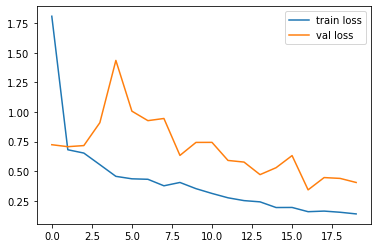

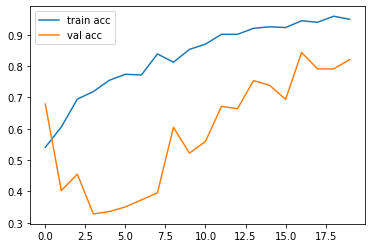

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label='train loss')
plt.plot(fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(fit.history['accuracy'], label='train acc')
plt.plot(fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred = malaria_model.predict(test_set)
y_pred

array([[9.99355257e-01, 6.44791406e-04],
       [9.54519451e-01, 4.54805456e-02],
       [2.62419701e-01, 7.37580240e-01],
       [9.98548090e-01, 1.45188079e-03],
       [3.97374302e-01, 6.02625728e-01],
       [4.91111018e-02, 9.50888932e-01],
       [1.13094389e-01, 8.86905611e-01],
       [9.88626659e-01, 1.13733700e-02],
       [2.19207734e-01, 7.80792236e-01],
       [9.42945063e-01, 5.70549518e-02],
       [5.65672278e-01, 4.34327692e-01],
       [9.10041988e-01, 8.99580345e-02],
       [3.04829814e-02, 9.69516993e-01],
       [4.78938110e-02, 9.52106237e-01],
       [7.06241727e-02, 9.29375887e-01],
       [7.35175833e-02, 9.26482439e-01],
       [5.66850491e-02, 9.43314910e-01],
       [2.34580070e-01, 7.65419960e-01],
       [9.23581481e-01, 7.64185190e-02],
       [9.99996424e-01, 3.60517606e-06],
       [3.77942249e-02, 9.62205768e-01],
       [8.90367180e-02, 9.10963297e-01],
       [2.13480487e-01, 7.86519527e-01],
       [9.82669473e-01, 1.73305143e-02],
       [8.209735

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [19]:
from tensorflow.keras.preprocessing import image

img = image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [20]:
img_a=image.img_to_array(img)
img_a

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [21]:
img_a.shape

(224, 224, 3)

In [22]:
from tensorflow.keras.applications.resnet50 import preprocess_input

img_a = img_a/255
img_a = np.expand_dims(img_a, axis=0)
img_data = preprocess_input(img_a)
img_data.shape

(1, 224, 224, 3)

In [23]:
malaria_model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [25]:
pred = np.argmax(malaria_model.predict(img_data), axis=1)

In [26]:
if(pred == 1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [28]:
from keras.models import load_model
malaria_model.save('model_vgg19.h5')